# WeatherPy
----

## Analysis
## Cities Pulled
The number of cities pulled from the citypy was 583. Of those cities, the Open Weather Map API found 527 cities. Looking at the graphs of Northern Hemisphere data vs Souther Hemisphere data, we can see just by the amount of plot points that there appear to have been more cities selected and found using the API in the Northern Hemisphere. This makes sense by looking at the globe, we can see most of the countries with the highest population are located in the Northern Hemisphere.

## Cloudiness Plateaus
Looking at the City Latitude vs Cloudiness graph for both hemispheres, we see the data plateauing across certain percentages of clouds. Some plateaus include 0% cloudiness and 100% cloudiness. Just through reading the data we can assume that latitude and cloudiness don't have a strong relationship, but we can infer that there are some areas of the planet where certain precipitation systems are moving and they can cover a wide range of latitudes. We would need to look at longitudinal data as well to see precisely where those cloudy systems may be.

## Temperature
Looking at the City Latitude vs Max Temperature graph, we can see a negative parabol curve showing the temperature rising up to a peak then dropping as the latitude increases. The majority of the highest temperatures are seen near latitude 0, or the equator. While it sounds obvious, we can infer that the closer you get to the equator, the hotter the average temperature will be, as this data was collected during winter time, and the temperatures still max out near the equator.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# Use "pip install citipy"
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:


# #Make URL with api key and imperial units to get Fahrenheit temperatures
# url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

#Make lists to store city name, cloudiness, country, date, humidity, lat, lng, max temp, and wind speed
name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
mTemp = []
windSpd = []

#Make for loop 
z=0
for x in cities:
#print out string that says it's searching for the city
#Starter while loop to test code before pulling big numbers
    
    print(f"Searching for {x} at index {z}..." )
#Make new url by adding city to end of URL

    response = requests.get(url+x).json()
        #Try to append the name to list by response['name']
    try:
        name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        mTemp.append(response['main']['temp_max'])
        windSpd.append(response['wind']['speed'])
        #Except if name doesn't exist in list
        #print out that the city wasn't found
    except:
        print(f"City {x} not found. Skipping...")
        pass
    z += 1
        #Next city


Searching for new norfolk at index 117...
Searching for barrow at index 118...
Searching for mweka at index 119...
Searching for westport at index 120...
Searching for kuche at index 121...
City kuche not found. Skipping...
Searching for andenes at index 122...
Searching for gimbi at index 123...
Searching for havre-saint-pierre at index 124...
Searching for borgarnes at index 125...
Searching for lavrentiya at index 126...
Searching for painesville at index 127...
Searching for vanimo at index 128...
Searching for sidney at index 129...
Searching for georgetown at index 130...
Searching for north platte at index 131...
Searching for khandyga at index 132...
Searching for sao filipe at index 133...
Searching for sobolevo at index 134...
Searching for cockburn harbour at index 135...
City cockburn harbour not found. Skipping...
Searching for shubarshi at index 136...
Searching for ribeira grande at index 137...
Searching for chara at index 138...
Searching for probolinggo at index 139..

NameError: name 'city_total' is not defined

In [8]:
# Print the city count to confirm sufficient count
city_total=len(cities)
print(f"Searched through {city_total} cities. Found and added {len(name)} to the list.")

Searched through 583 cities. Found and added 527 to the list.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Make dictionaries of the list of the city weather properties
weather_dict ={
    "Name":name,
    "Cloudiness":clouds,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng,
    "Max Temp": mTemp,
    "Wind Speed":windSpd
}
#Make dataframe from the list
weather_data = pd.DataFrame(weather_dict)

#Convert the time from UTC to date
for x in weather_data["Date"]:
    weather_data["Date"] = datetime.datetime.utcfromtimestamp(x)

#Print the DataFrame
print(weather_data.head())

Name  Cloudiness Country                Date  Humidity  Latitude  \
0     Hirānagar          92      IN 2020-03-14 23:38:56        57     32.45   
1      Karratha          90      AU 2020-03-14 23:38:56        72    -20.74   
2      Asifābād          59      IN 2020-03-14 23:38:56        61     19.37   
3  Ponta do Sol          75      PT 2020-03-14 23:38:56        67     32.67   
4     Upernavik          98      GL 2020-03-14 23:38:56        98     72.79   

   Longitude  Max Temp  Wind Speed  
0      75.27     52.20        3.60  
1     116.85     83.50       16.37  
2      79.28     77.14        1.45  
3     -17.10     60.80       10.29  
4     -56.15    -14.10        3.60  


In [11]:
#Print out the dataframe
weather_data.to_csv("output_data/cities.csv",index=False,header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot
#### This is a scatter plot that compares the latitude of a city entry to its max temperature in Fahrenheit. We see a slight parabolic arc of temps near latitude 0, near the equator.

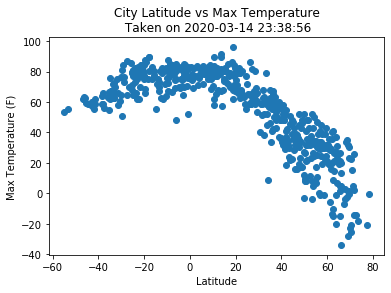

In [12]:
plt.scatter(weather_data['Latitude'],weather_data['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature\n Taken on {weather_data['Date'][0]}")
plt.savefig("output_data/temp_lat.png")
plt.show()

#### Latitude vs. Humidity Plot
#### This scatter plot looks at latitude for a given city vs it's humidity percentage. There doesn't appear to be any uniformity of data based on the relationship of humidity vs latitude

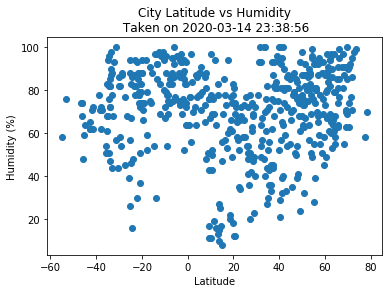

In [13]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity\n Taken on {weather_data['Date'][0]}")
plt.savefig("output_data/humid_lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot
#### This scatter plot looks at latitude of all of the cities vs their percentage of cloudiness on a certain date. The data lines up along certain rows on the graph, possibly indicating long vertical stretches of clouds that form across any latitude.

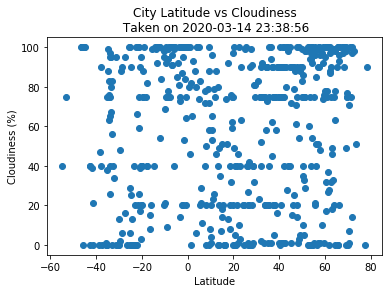

In [14]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness\n Taken on {weather_data['Date'][0]}")
plt.savefig("output_data/cloud_lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot
#### This scatter plot looks at the latitude of a given city vs the wind speed in MPH. The data appears to be clustered near lower wind speeds of 15 MPH or less. This possibly tells us that there aren't many powerful storms occurring in the given data.

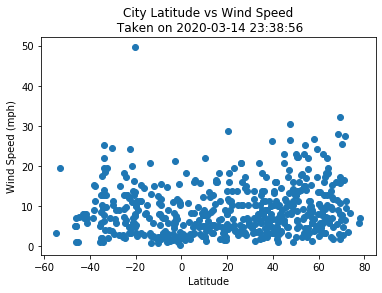

In [15]:
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed\n Taken on {weather_data['Date'][0]}")
plt.savefig("output_data/wind_lat.png")
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

#This function will take in two parameters: A set of x coordinates and a set of y coordinates to utilize linear regression to find a relationship between the two sets of data
def LinReg(x,y):
    #Using scipy stats to make linear regression equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept

    #Set the line variable to be used outside of this function
    global line_eq
    #Make the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Overlays the line on data outside of the function
    plt.plot(x,regress_values,"r-")

    #Get r squared value
    r_squared = rvalue*rvalue
    
    #Prints the r squared value for the given data
    print("The r squared value is: " + str(r_squared))


In [17]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
south_df = weather_data.loc[weather_data["Latitude"] <= 0,:]
print(north_df.head())
print(south_df.head())

Name  Cloudiness Country                Date  Humidity  Latitude  \
0     Hirānagar          92      IN 2020-03-14 23:38:56        57     32.45   
2      Asifābād          59      IN 2020-03-14 23:38:56        61     19.37   
3  Ponta do Sol          75      PT 2020-03-14 23:38:56        67     32.67   
4     Upernavik          98      GL 2020-03-14 23:38:56        98     72.79   
6       Qaanaaq           0      GL 2020-03-14 23:38:56        58     77.48   

   Longitude  Max Temp  Wind Speed  
0      75.27     52.20        3.60  
2      79.28     77.14        1.45  
3     -17.10     60.80       10.29  
4     -56.15    -14.10        3.60  
6     -69.36    -20.81        5.75  
           Name  Cloudiness Country                Date  Humidity  Latitude  \
1      Karratha          90      AU 2020-03-14 23:38:56        72    -20.74   
5         Vaini          75      TO 2020-03-14 23:38:56        79    -21.20   
7      Bengkulu          81      ID 2020-03-14 23:38:56        88     -3.80  

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#### This is a scatter plot of the northern hemisphere city latitudes vs their max temps. The r squared value is .774, which means that there is a strong relationship between latitude and temperature. The closer you get to the equator (0 lat), the higher the temp will be

The r squared value is: 0.7740257141966639


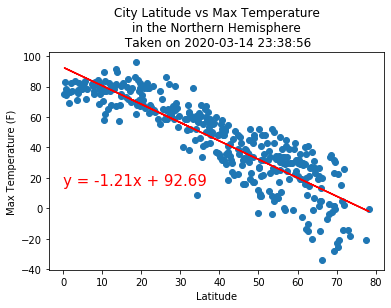

In [18]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature\nin the Northern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Max Temp'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.savefig("output_data/north_temp_lat_linreg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
#### This scatter plot examines the latitude of cities in the southern hemisphere vs their max temperatures. The r squared value for this data is .3076, which does not show a strong relationship between latitude and temperature. 

The r squared value is: 0.30760983213162285


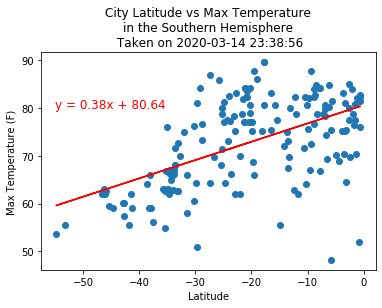

In [19]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature\nin the Southern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Max Temp'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-55,80),fontsize=12,color="red")
plt.savefig("output_data/south_temp_lat_linreg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#### This scatter plot examines the latitude of cities in the northern hemisphere vs the percentage of humidity. The r squared value is ..0978, which does not indicate a strong relationshp between latitude and humidity percentage. We can see that on the graph as well. The values are spread out across the range.

The r squared value is: 0.0978786562225111


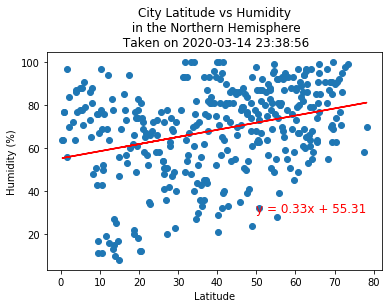

In [20]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity\n in the Northern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Humidity'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.savefig("output_data/north_humid_lat_linreg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#### This scatter plot examines the latitude of cities in the southern hemisphere vs the percentage of humidity. The r squared value is .1131, which does not indicate a strong relationshp between latitude and humidity percentage. The data points on the graph suggest to show that the closer you get to the equator, the more humid a given city might be.

The r squared value is: 0.11314002543517968


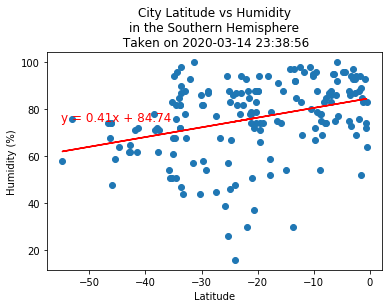

In [21]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity\nin the Southern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Humidity'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-55,75),fontsize=12,color="red")
plt.savefig("output_data/south_humid_lat_linreg.png")
plt.show()

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
#### This scatter plot looks aat the relationship between latitude for cities in the northern hemisphere and the percentage of clouds on the given day. The r squared value is .0372, which does not suggest a strong relationship between the two variables. The graph shows that the data plateaus on certain percentage levels across all latitude data

The r squared value is: 0.037245922647673374


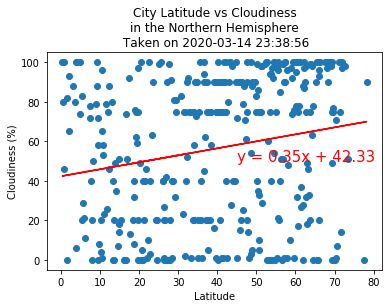

In [22]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness\nin the Northern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Cloudiness'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.savefig("output_data/north_cloud_lat_linreg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
#### This scatter plot looks aat the relationship between latitude for cities in the southern hemisphere and the percentage of clouds on the given day. The r squared value is .0996, which does not suggest a strong relationship between cloudiness and latitude. The graph shows that the data plateaus on certain percentage levels across all latitude data

The r squared value is: 0.09969129182161787


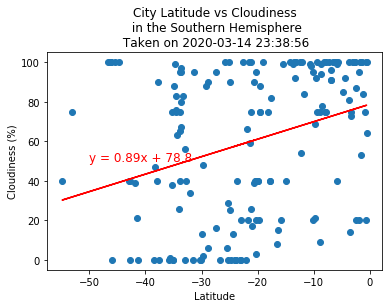

In [23]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness\n in the Southern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Cloudiness'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-50,50),fontsize=12,color="red")
plt.savefig("output_data/south_cloud_lat_linreg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#### This scatter plot looks aat the relationship between latitude for cities in the northern hemisphere and the wind speed on the given day. The r squared value is .0397, which does not suggest a strong relationship between the two variables. The graph shows that the most of the cities did not experience high levels of wind on the given day, but some cities closer to the equator saw wind speeds up to 40 MPH

The r squared value is: 0.03973946438246136


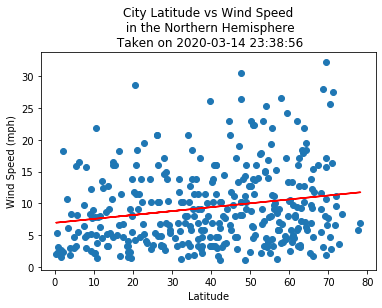

In [24]:
#Print graph for the data
plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed\n in the Northern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(north_df['Latitude'],north_df['Wind Speed'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(50,-1),fontsize=12,color="red")
plt.savefig("output_data/noth_wind_lat_linreg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#### This scatter plot looks aat the relationship between latitude for cities in the southern hemisphere and the wind speed on the given day. The r squared value is .0235, which does not suggest a strong relationship between the two variables. Most cities in the southern hemisphere did not experience wind speeds higher than 10 MPH on the given day.


The r squared value is: 0.023583716338391233


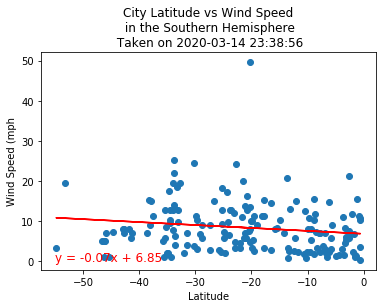

In [25]:
#Print graph for the data
plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph")
plt.title(f"City Latitude vs Wind Speed\n in the Southern Hemisphere\n Taken on {weather_data['Date'][0]}")
#Call LinReg using Latitude and Temp
LinReg(south_df['Latitude'],south_df['Wind Speed'])
#Make regression line and overlay on the graph
#print(line_eq)
plt.annotate(line_eq,(-55,0),fontsize=12,color="red")
plt.savefig("output_data/south_wind_lat_linreg.png")
plt.show()